In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn import tree

In [2]:
#load data
df = pd.read_excel("dataset_siswa.xlsx")
df

,Nilai UN,Nilai Tes Penempatan,Nilai Ujian Sekolah,Nilai UN-label,Nilai Tes Penempatan-label,Nilai Ujian Sekolah-label,Minat Siswa,Penempatan
0,38,70,70.0,VP,F,F,1,2
1,38,80,79.0,VP,G,G,2,2
2,50,74,77.0,VP,G,G,1,1
3,33,71,71.0,VP,G,G,2,2
4,65,70,74.0,F,F,G,2,2
...,...,...,...,...,...,...,...,...
235,73,71,80.0,G,G,G,1,2
236,45,80,90.0,VP,G,VG,2,2
237,45,71,95.0,VP,G,VG,1,1
238,50,58,95.0,VP,P,VG,1,2


Label Explanation:

Very Good (VG), Good (G), Fair (F), Poor (P),dan Very Poor (VP)

1 = IPA,2 = IPS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Nilai UN                    240 non-null    int64  
 1   Nilai Tes Penempatan        240 non-null    int64  
 2   Nilai Ujian Sekolah         240 non-null    float64
 3   Nilai UN-label              240 non-null    object 
 4   Nilai Tes Penempatan-label  240 non-null    object 
 5   Nilai Ujian Sekolah-label   240 non-null    object 
 6   Minat Siswa                 240 non-null    int64  
 7   Penempatan                  240 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.1+ KB


In [4]:
df.shape

(240, 8)

this dataset consist of 240 rows and 8 columns

In [5]:
#check missing values in dataset
df.isnull().any()

Nilai UN                      False
Nilai Tes Penempatan          False
Nilai Ujian Sekolah           False
Nilai UN-label                False
Nilai Tes Penempatan-label    False
Nilai Ujian Sekolah-label     False
Minat Siswa                   False
Penempatan                    False
dtype: bool

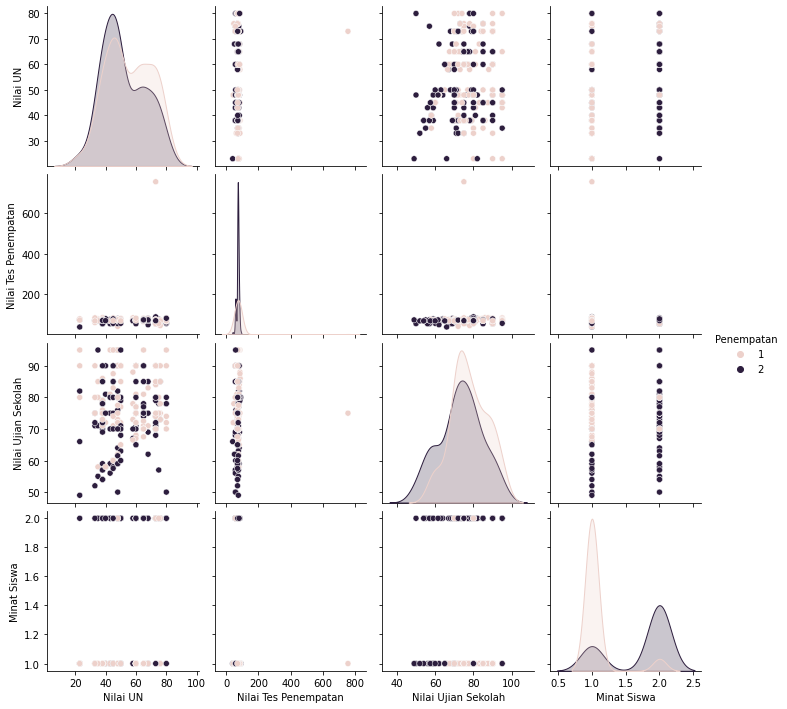

In [6]:
#plotting pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Penempatan')

<AxesSubplot:>

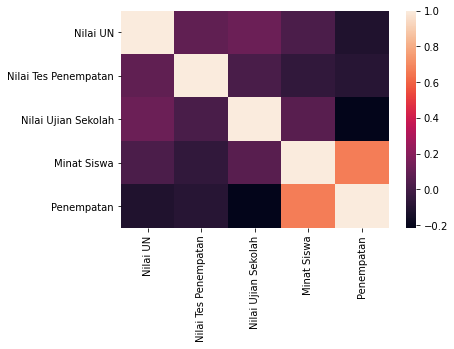

In [7]:
#correlation matrix
sns.heatmap(df.corr())

"Minat Siswa" has a positive correlation with 'Penempatan'

## Data Preprocessing

In [13]:
# make a copy of dataset 'df' in case we want to modify it or things didn't workout as we expect.
dataset = df.copy()
dataset = dataset.drop(['Nilai UN-label', 'Nilai Tes Penempatan-label', 'Nilai Ujian Sekolah-label', 'Penempatan'], axis=1)
dataset

,Nilai UN,Nilai Tes Penempatan,Nilai Ujian Sekolah,Minat Siswa
0,38,70,70.0,1
1,38,80,79.0,2
2,50,74,77.0,1
3,33,71,71.0,2
4,65,70,74.0,2
...,...,...,...,...
235,73,71,80.0,1
236,45,80,90.0,2
237,45,71,95.0,1
238,50,58,95.0,1


In [14]:
#storing 'dataset' in X for most used convention
X = dataset
#storing target variable ('Penempatan') in variable y
y = df.loc[:, 'Penempatan']
y

0      2
1      2
2      1
3      2
4      2
      ..
235    2
236    2
237    1
238    2
239    1
Name: Penempatan, Length: 240, dtype: int64

usually target variable is categorical and need to be encoded, but target variable in our dataset already numerical. so we did not need encoding

In [15]:
#split dataset into train and test data into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (168, 4)
Testing split input-  (72, 4)


In [56]:
#Modeling Tree and Testing 
dtree=DecisionTreeClassifier(max_depth = 4, 
                             random_state = 0)
#Training the model on the data, storing the information learned from the data
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In the above code, we created an object of the class DecisionTreeClassifier , store its address in the variable dtree, so we can access the object using dtree. Then we fit this tree with our X_train and y_train . Finally, we print the statement Decision Tree Classifier Created after the decision tree is built.

In [57]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           1       0.91      0.84      0.88        38
           2       0.84      0.91      0.87        34

    accuracy                           0.88        72
   macro avg       0.88      0.88      0.87        72
weighted avg       0.88      0.88      0.88        72



* Precision quantifies the number of positive class predictions that actually belong to the positive class.
* Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
* F-Measure provides a single score that balances both the concerns of precision and recall in one number.

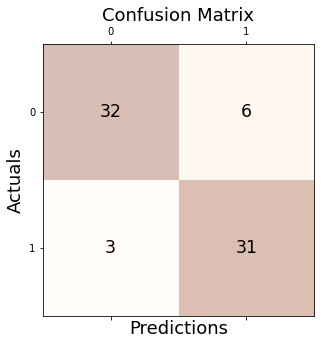

In [58]:
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [59]:
# Measure Model Performance
score = dtree.score(X_test, y_test)
print(score)

0.875


Accuracy is defined as: correct predictions / total number of data points

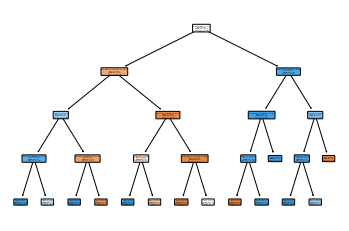

In [60]:
#Visualize The Decision tree
dec_tree = plot_tree(decision_tree=dtree, feature_names = dataset.columns, 
                     class_names =["1", "2"] , filled = True, rounded = True)

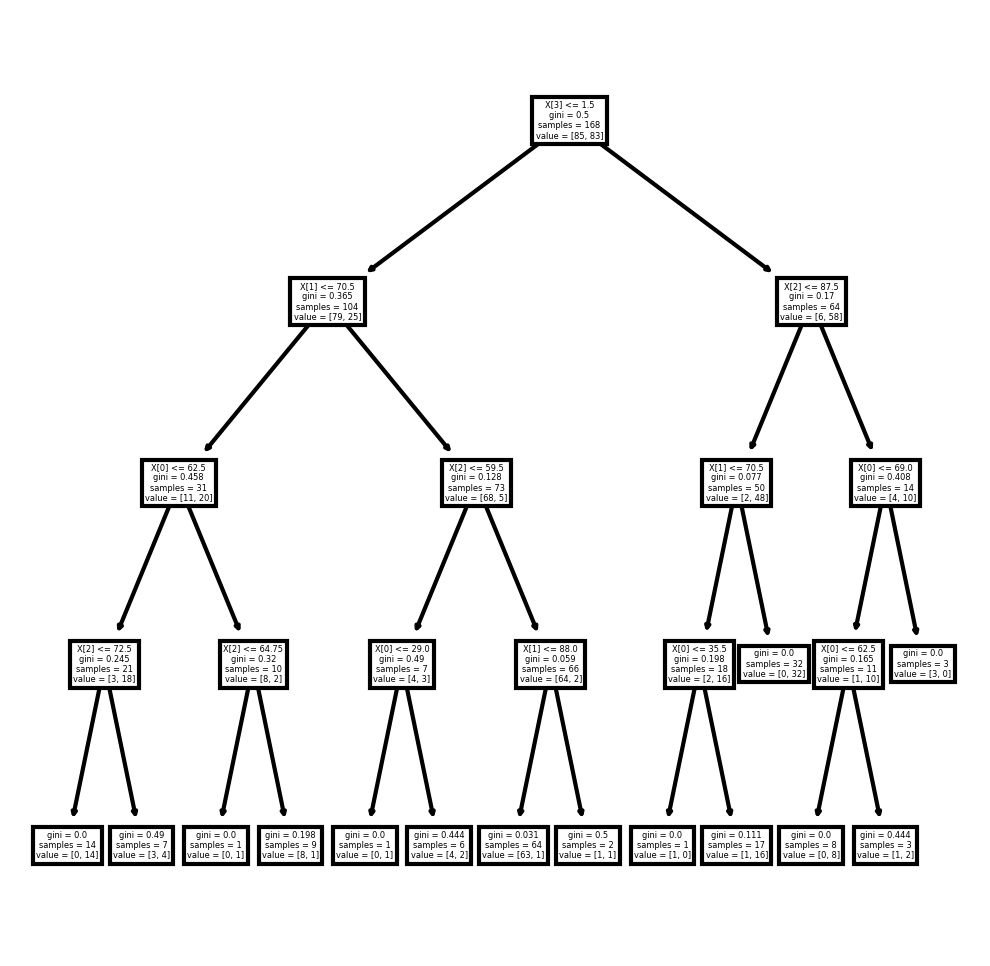

In [61]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dtree);
fig.savefig('plottreedefault.png')

In [52]:
# Putting the feature names and class names into variables
fn = ['Nilai UN','Nilai Tes Penempatan','Nilai Ujian Sekolah', 'Minat Siswa']
cn = ['1', '2']

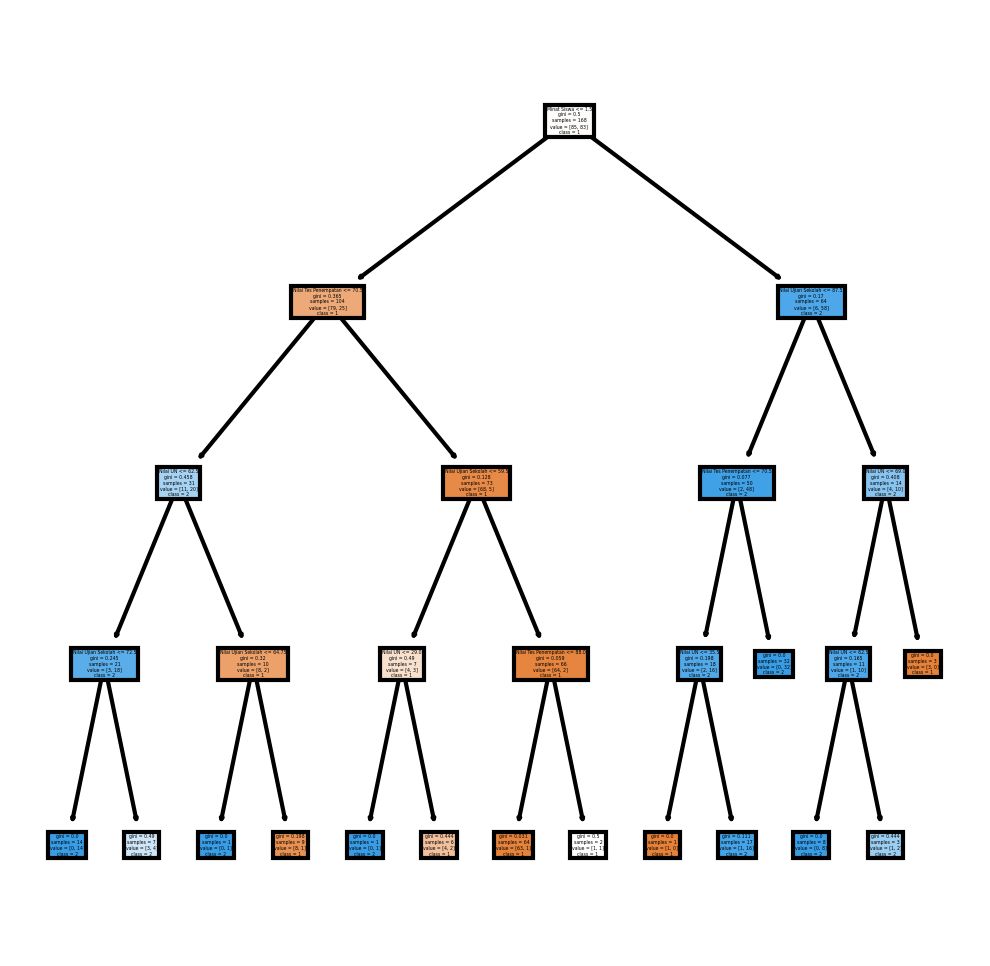

In [62]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dtree,
          feature_names = fn, 
          class_names=cn,
          filled = True);
fig.savefig('plottreefncn.png')